<a href="https://colab.research.google.com/github/Soorajb19/Music-Recommendation-System/blob/main/Music_Recommendation_System_Full_Code_FINAL_Sooraj_Biju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 With the growing number of songs available, manually searching for preferred music is overwhelming. A recommendation system enhances user experience by providing personalized music suggestions. Platforms like Spotify, Apple Music, and YouTube Music depend on smart recommendation systems to increase engagement and retention. Better recommendations mean higher user satisfaction and revenue for streaming services.

### **The objective:**

The goal is to buld a recommendation system to propose the top 10 songs for user based on the likelihoodof listening to those songs.

### **The key questions:**

- What are the key questions that need to be answered?
1. How can we recommend songs that match a user's preferences?
2. Which algorithm performs best in making personalized recommnedations?
3. Should reccomendation be based on past listener behaviour, song content, or both?
4. How can we handle new used with little or no interaction history (cold start problem)?
5. How do we evaluate the effectivness of our model's recommnedations? Will it base on accuracy, Novelty, etc.?


### **The problem formulation**:

- What is it that we are trying to solve using data science?

We aim to build a data-driven recommendation system that can predict what songs a user is most likely to enjoy. We will be utilizing ranked based, collaborative, Matrix factorization and content based methods. Aim is to improve engagement and user satisfaction in streaming platforms.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/MIT-Data Science/CP-Recommendation/MRdataset.zip'

Archive:  /content/drive/MyDrive/MIT-Data Science/CP-Recommendation/MRdataset.zip
  inflating: song_data.csv           
  inflating: count_data.csv          


In [ ]:
# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd


# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt


# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns


# Import warnings to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict
# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/count_data.csv')
song_df = pd.read_csv('/content/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# Display info of count_df
count_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  2000000 non-null  int64 
 1   user_id     2000000 non-null  object
 2   song_id     2000000 non-null  object
 3   play_count  2000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


Observations: song_df contains 100,000 rows and count of user id is 2,000,000. count_df contains a coloumn named "Unnammed:0" which can be removed as it provied no additional information. Datatypes of song_if and user_id are objects, which may require encoding for efficient computation. "year" has 0 values in somecases, likely indicating missing or unknown release years. Merging these data will be help build recommendation system.

In [ ]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df, on='song_id', how='left').drop_duplicates()
df

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...,...
2086941,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
2086942,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2086943,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2086944,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [ ]:
# Drop the column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
2086941,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
2086942,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2086943,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2086944,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2054534 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      2054534 non-null  object
 1   song_id      2054534 non-null  object
 2   play_count   2054534 non-null  int64 
 3   title        2054534 non-null  object
 4   release      2054534 non-null  object
 5   artist_name  2054534 non-null  object
 6   year         2054534 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 125.4+ MB


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

# Fit and transform the 'user_id' column
df['user_id_encoded'] = user_encoder.fit_transform(df['user_id'])

# Fit and transform the 'song_id' column
df['song_id_encoded'] = song_encoder.fit_transform(df['song_id'])

# Display the first 5 rows of the dataframe to verify the new columns are present.
df.head()

,user_id,song_id,play_count,title,release,artist_name,year,user_id_encoded,song_id_encoded
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,54961,153
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,54961,413
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,54961,736
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,54961,750
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,54961,1188


In [ ]:
# Drop the original unencoded columns
df.drop(['user_id', 'song_id'], axis=1, inplace=True)
df.rename(columns = {'user_id_encoded':'user_id', 'song_id_encoded':'song_id'}, inplace = True)
df.head()

,play_count,title,release,artist_name,year,user_id,song_id
0,1,The Cove,Thicker Than Water,Jack Johnson,0,54961,153
1,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,54961,413
2,1,Stronger,Graduation,Kanye West,2007,54961,736
4,1,Constellations,In Between Dreams,Jack Johnson,2005,54961,750
5,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,54961,1188


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2054534 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   play_count   int64 
 1   title        object
 2   release      object
 3   artist_name  object
 4   year         int64 
 5   user_id      int64 
 6   song_id      int64 
dtypes: int64(4), object(3)
memory usage: 125.4+ MB


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final.user_id.nunique()

3337

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final.song_id.nunique()

620

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final.artist_name.nunique()

247

The dataset contains only 620 unique songs for 3,337 users.
This suggests that many users have interacted with a limited set of songs.
Sparse interaction data, which might affect collaborative filtering performance. There are 247 unique artists for 620 songs, meaning that many artists have multiple songs. Some artists might be overrepresented, while others have only one or two songs in the dataset.Some songs are likely played by many users, while others might have very few interactions. From the chart below we can observe that Coldplay leads in play count followed by kings of leon and The killers.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Find the most interacted songs
most_interacted_songs = df_final.groupby('song_id')['play_count'].sum().sort_values(ascending=False).head(10)
most_interacted_songs


,play_count
song_id,
8582,3126
6293,2216
1286,1774
3567,1762
352,1752
2220,1692
7796,1660
7998,1592
310,1580


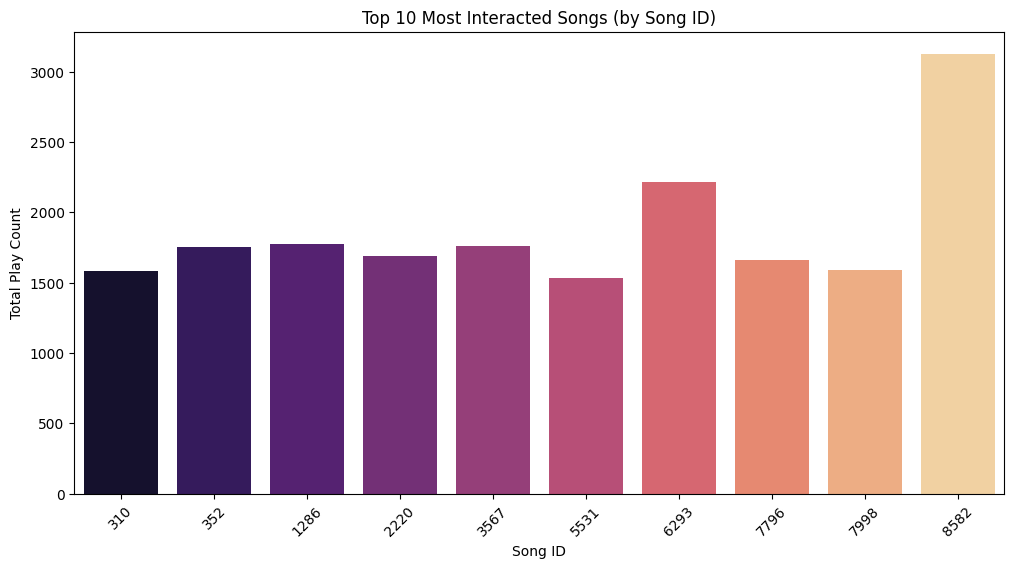

In [ ]:
# Find the top 10 most interacted songs by song_id
top_interacted_songs = df_final.groupby('song_id')['play_count'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame for better visualization
top_interacted_songs_df = top_interacted_songs.reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_interacted_songs_df['song_id'],
            y=top_interacted_songs_df['play_count'],
            palette='magma')

plt.xlabel("Song ID")
plt.ylabel("Total Play Count")
plt.title("Top 10 Most Interacted Songs (by Song ID)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Find the artist for song_id 8582
song_id_to_find = 8582

# Use boolean indexing to filter the DataFrame based on the song_id_encoded value
artist_name = df_final[df_final['song_id'] == song_id_to_find]['artist_name'].iloc[0]


print(f"The artist for song_id {song_id_to_find} is: {artist_name}")


The artist for song_id 8582 is: Kings Of Leon


Most interacted users

In [ ]:
# Most interacted users
most_interacted_users = df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False).head(10)
most_interacted_users


,play_count
user_id,
3237,631
15733,501
62759,479
43041,459
27401,448
37049,442
66268,436
48844,436
23337,434


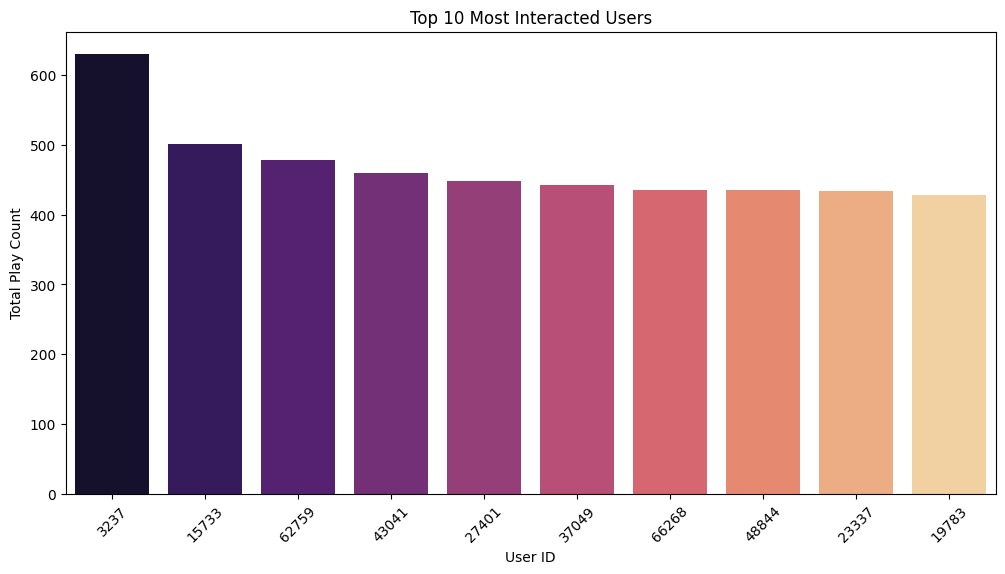

In [ ]:
# Convert Series to DataFrame for plotting
most_interacted_users_df = most_interacted_users.reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=most_interacted_users_df['user_id'].astype(str),
            y=most_interacted_users_df['play_count'],
            palette='magma')

plt.xlabel("User ID")
plt.ylabel("Total Play Count")
plt.title("Top 10 Most Interacted Users")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


Observations: The song with Song ID 8582 has the highest play count (~3,126), significantly higher than the rest from the artist Kings of Leon which is second most populat artist from the overall dataset.Song ID 6293 follows next with 2,216 play counts.The play counts gradually decrease for the remaining top 10 songs.
There is a noticeable gap between the most played song (8582) and the second most played (6293), which may indicate a popular hit or trending song.
The overall distribution shows that a few songs are highly played, while most songs have significantly lower interaction. User ID 3237 is the most active user, with 631 total play counts.
Other top users have significantly fewer interactions, with the second-highest (15733) at 501 plays.
The play count distribution is flatter compared to songs, meaning user engagement is more balanced.
The difference between the highest and lowest of the top 10 users is not as large, indicating multiple highly engaged users rather than a single dominant one.

 A few songs are significantly more popular than the rest, showing a clear power-law distribution in song interactions. User interaction is more evenly distributed, meaning multiple users have high engagement rather than just one.


Total songs in dataset: 620
Songs with at least one interaction: 620
Songs never interacted with: 0


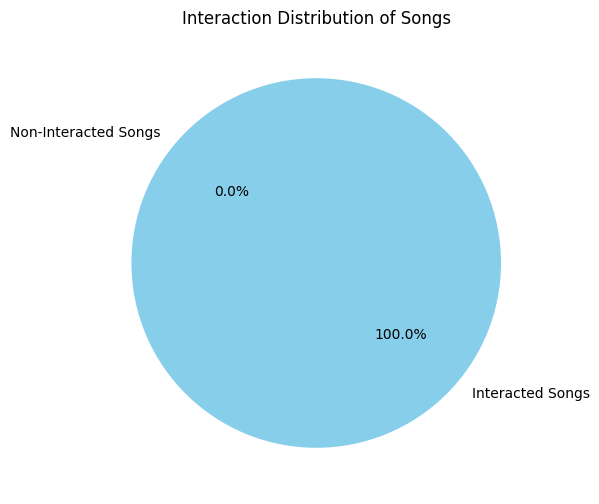

In [ ]:
# Find the total number of unique songs in the dataset
total_songs = df_final['song_id'].nunique()

# Find the number of songs that have been interacted with (at least one play_count entry)
interacted_songs = df_final[df_final['play_count'] > 0]['song_id'].nunique()

# Calculate the number of songs that have not been interacted with
non_interacted_songs = total_songs - interacted_songs

# Print results
print(f"Total songs in dataset: {total_songs}")
print(f"Songs with at least one interaction: {interacted_songs}")
print(f"Songs never interacted with: {non_interacted_songs}")

# Visualizing the distribution
labels = ['Interacted Songs', 'Non-Interacted Songs']
values = [interacted_songs, non_interacted_songs]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgray'], startangle=140)
plt.title("Interaction Distribution of Songs")
plt.show()

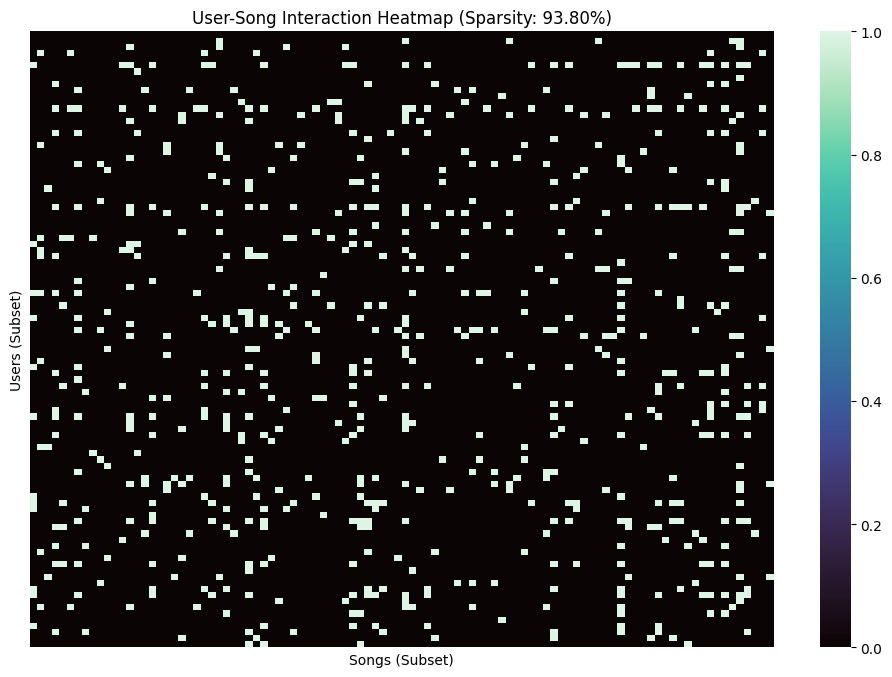

Dataset Sparsity: 93.80%


In [ ]:
# Create a user-item interaction matrix
user_song_matrix = df_final.pivot_table(index="user_id", columns="song_id", values="play_count", aggfunc='sum', fill_value=0)

# Calculate sparsity percentage
total_entries = user_song_matrix.shape[0] * user_song_matrix.shape[1]
non_zero_entries = (user_song_matrix > 0).sum().sum()
sparsity = 1 - (non_zero_entries / total_entries)

# Convert to binary matrix (1 = interaction, 0 = no interaction)
binary_matrix = (user_song_matrix > 0).astype(int)

# Sample a larger portion for better visualization
sample_users = min(100, binary_matrix.shape[0])  # Use up to 500 users (or full data if smaller)
sample_songs = min(100, binary_matrix.shape[1])  # Use up to 500 songs (or full data if smaller)
binary_sample = binary_matrix.iloc[:sample_users, :sample_songs]

# Plot heatmap with improved color scaling
plt.figure(figsize=(12, 8))
sns.heatmap(binary_sample, cmap="mako", cbar=True, xticklabels=False, yticklabels=False)
plt.xlabel("Songs (Subset)")
plt.ylabel("Users (Subset)")
plt.title(f"User-Song Interaction Heatmap (Sparsity: {sparsity:.2%})")
plt.show()

# Print sparsity percentage
print(f"Dataset Sparsity: {sparsity:.2%}")


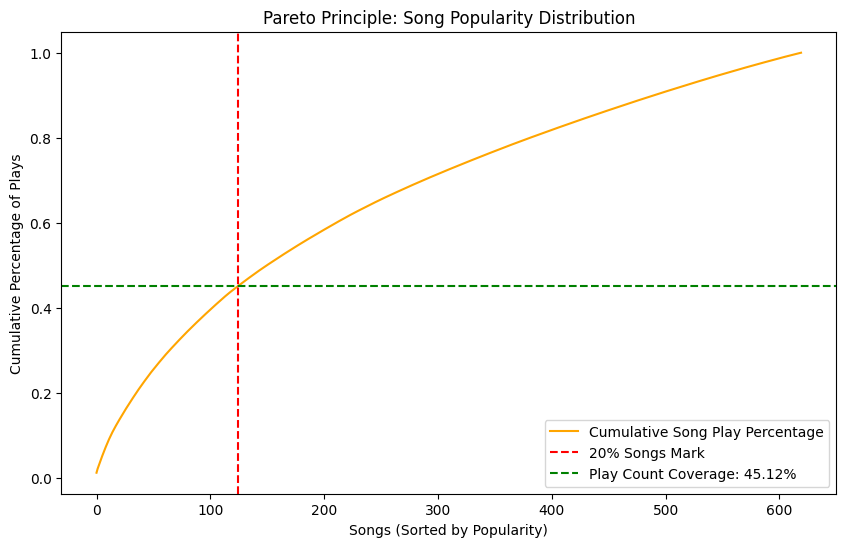

Percentage of total plays covered by top 20% songs: 45.12%


In [ ]:
# Aggregate total play count per song
song_popularity = df_final.groupby('song_id')['play_count'].sum().sort_values(ascending=False)

# Compute cumulative percentage of total plays
song_popularity_cumsum = song_popularity.cumsum() / song_popularity.sum()

# Determine the 20% song threshold
threshold_index = int(len(song_popularity) * 0.2)
percentage_covered = song_popularity_cumsum.iloc[threshold_index]

# Plot cumulative song popularity distribution
plt.figure(figsize=(10, 6))
plt.plot(song_popularity_cumsum.values, label="Cumulative Song Play Percentage", color='orange')
plt.axvline(threshold_index, color='r', linestyle='--', label="20% Songs Mark")
plt.axhline(percentage_covered, color='g', linestyle='--', label=f"Play Count Coverage: {percentage_covered:.2%}")
plt.xlabel("Songs (Sorted by Popularity)")
plt.ylabel("Cumulative Percentage of Plays")
plt.title("Pareto Principle: Song Popularity Distribution")
plt.legend()
plt.show()

# Print the actual percentage of total plays covered by the top 20% songs
print(f"Percentage of total plays covered by top 20% songs: {percentage_covered:.2%}")



Oberservation:  Analysis shows that the top 20% of songs contribute to 45% of total plays, indicating a more balanced song distribution compared to the traditional 80/20 rule. This suggests a wider diversity in user listening habits.

In [ ]:
import plotly.express as px
import pandas as pd

# Aggregating data for visualization
song_popularity = df_final.groupby('song_id')['play_count'].sum().reset_index()
user_interaction = df_final.groupby('user_id')['play_count'].sum().reset_index()
top_artists = df_final.groupby('artist_name')['play_count'].sum().reset_index().sort_values(by='play_count', ascending=False).head(10)
top_songs = df_final.groupby(['song_id', 'title'])['play_count'].sum().reset_index()
top_songs = top_songs.sort_values(by='play_count', ascending=False).head(10)


# Plot 1: Distribution of Song Popularity (Play Counts)
fig1 = px.histogram(song_popularity, x='play_count', nbins=50, title="Distribution of Song Popularity (Play Counts)", color_discrete_sequence=['grey'])
fig1.update_xaxes(title_text="Total Play Count per Song")
fig1.update_yaxes(title_text="Number of Songs")

# Plot 2: Distribution of User Interactions
fig2 = px.histogram(user_interaction, x='play_count', nbins=50, title="Distribution of User Interactions", color_discrete_sequence=['Grey'])
fig2.update_xaxes(title_text="Total Play Count per User")
fig2.update_yaxes(title_text="Number of Users")

# Plot 3: Top 10 Most Played Artists
fig3 = px.bar(top_artists, x='play_count', y='artist_name', orientation='h', title="Top 10 Most Played Artists", color='play_count')
fig3.update_xaxes(title_text="Total Play Counts")
fig3.update_yaxes(title_text="Artist")

fig4 = px.bar(top_songs, x='play_count', y='title', orientation='h', title="Top 10 Most Played Songs", color='play_count')
fig4.update_xaxes(title_text="Total Play Counts")
fig4.update_yaxes(title_text="Song Title")

# Show the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [ ]:
fig1.write_html("song_popularity.html")
fig2.write_html("user_interactions.html")
fig3.write_html("top_artists.html")
fig4.write_html("top_songs.html")


Observation:

In the first figure (Distribution of Song Popularity (Play Counts) Histogram) we can see how often songs are played across the dataset. Here we can see most songs have low play counts as the left most bars are the tallest. We can see that this follows a long tail distribution. We can also observe that a few songs are popular with more 3k play counts, from figure 4 we can it is Use Somebody by Kings of Leon who are the second most play counts.

In the second figure (Distribution of User Interactions) we can observe how many songs each used have interacted with (total play counts per user). The left side of the grpah is very tall, meaning most user have low play counts. Majority of users have a play count below 100. The right side flattens out meaning some users listen to many songs. Only a small fraction  of users have 500+ total plays. Long-Tail distribution sigesst a small number of users account for a large portion of interactions. This means Cold Start Problem for New Users → New or low-interaction users have little data Since users have varied listening behaviors, SVD works better than user-user KNN.If top users play a lot of music, the model might bias recommendations toward their preferences.

Songs released on yearly basis

In [ ]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
  # Group the song_df by year and count the number of songs in each year
number_songs_per_year = df_final.groupby('year')['song_id'].count()

# Display the resulting series
number_songs_per_year

,song_id
year,
0,23404
1969,244
1970,191
1971,139
1973,426
1974,617
1975,181
1976,504
1978,307


In [ ]:
total_songs = df_final.shape[0]
zero_year_songs = df_final[df_final['year'] == 0].shape[0]
print(f"Percentage of songs with year 0: {zero_year_songs / total_songs * 100:.2f}%")

Percentage of songs with year 0: 16.92%


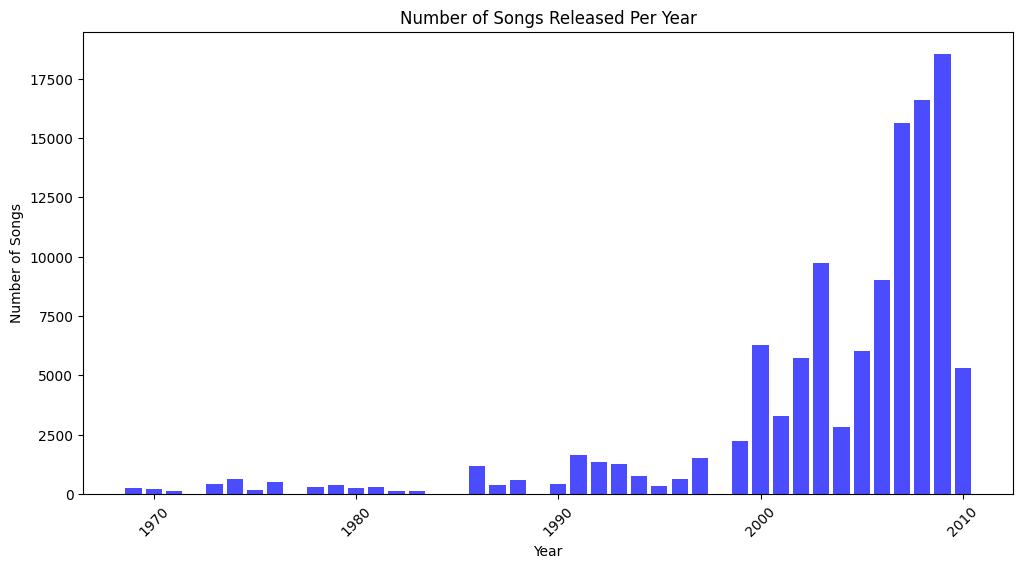

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Filter out year 0
filtered_df = df_final[df_final['year'] != 0]

# Group by year and count the number of songs
number_songs_per_year = filtered_df.groupby('year')['song_id'].count()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(number_songs_per_year.index, number_songs_per_year.values, color='blue', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Number of Songs Released Per Year")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Observations: 16.92% of the songs entered in the dataset have missing release year since it is small value we filtered out 0 values to for a better view of the songs with release year. From the groph we can see  number of songs released per year was relatively low before 2000.After 2000, there was a rapid increase in song releases.The highest number of releases occurred in the late 2000s and early 2010s. The last bar (post-2010) drops significantly. The dataset may not have complete information for recent years.
It could be a data collection issue, where newer songs haven't been recorded yet. Since the dataset is skewed towards recent years, older songs might be underrepresented. This could affect recommendation accuracy.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
avg_count = df_final.groupby('song_id')['play_count'].mean()
# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby('song_id')['play_count'].count()

In [ ]:
# Making a dataframe with the average_count and play_freq
# Create a new DataFrame with average play count and play frequency
final_play = pd.DataFrame({
    'avg_play_count': df_final.groupby('song_id')['play_count'].mean(),
    'play_frequency': df_final.groupby('song_id')['play_count'].sum()
}).reset_index()



# Let us see the first five records of the final_play dataset

print(final_play.head())

   song_id  avg_play_count  play_frequency
0       21        1.631387             447
1       22        1.464286             205
2       50        1.616822             173
3       52        1.715232             777
4       62        1.727273             209


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_song(data, n, min_interaction = 100):
    recommendations = data[data['play_frequency']> min_interaction]

    recomendations = recommendations.sort_values('avg_play_count', ascending=False)

    return recommendations.head(n)


In [ ]:
# Recommend top 10 songs using the function defined above
top_n_song(final_play, 10)

,song_id,avg_play_count,play_frequency
0,21,1.631387,447
1,22,1.464286,205
2,50,1.616822,173
3,52,1.715232,777
4,62,1.727273,209
5,93,1.436975,171
6,97,1.616915,650
7,114,1.869048,314
8,118,1.836207,213
9,122,1.338983,158


Observations: The average play count for top songs is around 1.4 - 1.8, which means most songs in the top recommendations have been played multiple times per user on average. This suggests consistent engagement with these songs.The highest play frequency is 777 (Song ID: 52), meaning it was the most played song overall in the dataset. However, some lower-ranked songs have higher play counts than those ranked above them, indicating play frequency alone is not the deciding factor—songs are ranked primarily by average play count per user.
A song might be popular but only played once per user, leading to a lower average play count.

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505172 sha256=9105761d5a0c6b6a3155f1952ec87081e6eb2564b3144b88c7fff28a7543eb6f
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


### Some useful functions

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0,5))
# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
# Splitting the data into train and test dataset

trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)


# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user)


RMSE: 1.0817
Precision:  0.401
Recall:  0.705
F_1 score:  0.511


Observations and Insights: Decreasing the testset size decrased the RMSE value. proceeding with 40% for testset for faster computation. AN RMSE of 1.08 suggests a moderate level of accuracy, but there's still room for improvement.40.1% precision indicates that 4 out of 10 recommended songs are accurate.  70.5% recall is relatively high, meaning most relevant songs were suggested.
High recall but lower precision suggests that the model recommends too many songs, some of which may not be relevant.F1 = 0.511, it suggests a trade-off between correct recommendations and false positives.

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(uid = 6958, iid = 1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.7227331119335394, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
def n_user_not_interacted_with(n, data, song_id):
    users_interacted_with_song = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_song))[:n]

In [ ]:
n_user_not_interacted_with(10,df_final, 1671)

[8194, 49157, 32773, 8199, 40969, 11, 49164, 24589, 17, 73748]

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(uid = 6958, iid = 8194)

Prediction(uid=6958, iid=8194, r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

Observations:
User ID: 6958, Song ID: 1671 Predicted Play Count: 1.72
 The model used 40 nearest neighbors to make this prediction. This indicates that the model was able to predict the user's play count for a song they have already interacted with, meaning there was enough similarity data from other users.

User ID: 6958, Song ID: 8194
prediction failed.
If User ID 6958 or Song ID 8194 was not seen during training, the model cannot generate a prediction.


Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
 # Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0169619589398478
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0234
Precision:  0.446
Recall:  0.634
F_1 score:  0.524


Observation: Lower RMSE (1.01669 from GridSearch vs. 1.0817 from earlier runs)

Indicates better accuracy in predicting user-song play counts after tuning.
The best similarity metric found was Mean Squared Difference (msd) instead of cosine similarity.

Precision improved from 40.1% → 44.6%. Which means More relevant songs are being recommended. Users are getting better-quality recommendations.

Recall dropped from 70.5% → 63.4%. The model is now more selective in recommending songs. It does not recommend as many songs as before, but the ones it does are more accurate.

F1 Score increased from 51.1% → 52.4%

A slight improvement, indicating a better balance between precision and recall.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(uid = 6958, iid = 1671, r_ui = 2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.6300980531476479, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Define user ID
user_id = 6958

# Get all unique song IDs
all_songs = set(df_final['song_id'].unique())

# Get songs that user 6968 has listened to
listened_songs = set(df_final[df_final['user_id'] == user_id]['song_id'])

# Find songs NOT listened to
unseen_songs = list(all_songs - listened_songs)

# Display the first 10 unseen songs (for readability)
print(f"User {user_id} has NOT listened to these songs:\n{unseen_songs[:10]}")

User 6958 has NOT listened to these songs:
[2048, 6148, 2054, 21, 22, 6175, 8224, 4134, 2091, 6189]


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(uid = 6958, iid = 2048, r_ui = 2)

Prediction(uid=6958, iid=2048, r_ui=2, est=1.625, details={'actual_k': 40, 'was_impossible': False})

Observations: The expected play count (r_ui=2) is slightly higher than the predicted play count (est=1.63).
The model used 40 neighbors (actual_k=40) to estimate this value.
Prediction was successful (was_impossible=False), meaning the system had enough data to make a reliable estimate.

The predicted play count for song 2048 is 1.625.
The system was able to make a prediction (was_impossible=False), meaning there are users in the dataset with similar tastes who have interacted with this song.
Since est=1.625 is lower than the expected r_ui=2, it suggests that:
User 6958 is less likely to engage deeply with this song.
The song might be somewhat relevant but not a top recommendation.


**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 10)

[3, 6, 9, 11, 14, 16, 19, 20, 23, 34]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    data = data.groupby(['user_id', 'song_id'], as_index=False)['play_count'].sum()

    # Creating an empty list to store the recommended song ids
    recommendations = []


    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')


    # Extracting those song ids which the user_id has not played yet
    non_interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_items:


        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, song_id).est


        # Appending the predicted play_counts
        recommendations.append((song_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)


    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])


,song_id,predicted_play_count
0,7224,3.434130
1,5344,2.701891
2,3951,2.668535
3,5653,2.586124
4,6450,2.544423


Observations: Song ID 7224 is the most recommended, meaning the model is highly confident that the user will listen to it multiple times. Top recommendation (3.43) is significantly higher than the last recommendation (2.54).
This suggests that the first few recommendations are more relevant, while lower-ranked ones are less confident.  a predicted play count above 2.5 suggests these songs are expected to be listened to multiple times.
This indicates good confidence in the model’s recommendations.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_play):
    # Ensure final_play has 'song_id' as an index
    if 'song_id' in final_play.columns:
        final_play = final_play.set_index('song_id')

    # Filter out songs that are not in final_play
    valid_recommendations = [song_id[0] for song_id in recommendations if song_id[0] in final_play.index]

    # Debug: Print missing songs
    missing_songs = [song_id[0] for song_id in recommendations if song_id[0] not in final_play.index]
    print("Missing songs in final_play:", missing_songs)

    # If no valid recommendations, return empty list
    if not valid_recommendations:
        print("No valid recommendations found in final_play.")
        return []

    # Sort recommended songs based on play frequency (instead of missing play_count)
    ranked_songs = final_play.loc[valid_recommendations].sort_values('play_frequency', ascending=False)[['play_frequency']].reset_index()

    # Merge recommendations with predicted play counts
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count']), on='song_id', how='inner')

    # Apply penalty to less popular songs (corrected play counts)
    ranked_songs['corrected_play_counts'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_frequency'])

    # Sort based on corrected play counts
    ranked_songs = ranked_songs.sort_values('corrected_play_counts', ascending=False)

    return ranked_songs  # Return ranked DataFrame


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)


Missing songs in final_play: []


,song_id,play_frequency,predicted_play_count,corrected_play_counts
0,7224,367,3.434130,3.381931
4,5344,219,2.701891,2.634317
3,3951,246,2.668535,2.604778
2,5653,250,2.586124,2.522879
1,6450,288,2.544423,2.485497


Observations: The corrected play counts are slightly lower than the predicted values.The corrections are small, meaning the model’s predictions were fairly accurate. The song with the highest predicted play count (3.43) also has a high play frequency (367).This suggests that popular songs are naturally recommended more.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0320
Precision:  0.316
Recall:  0.572
F_1 score:  0.407


Observations: RMSE is Slightly Worse for Item-Item Filtering

1.0320 vs. 1.0234 (User-User performed slightly better).
Both models are comparable in accuracy, but User-User filtering provides slightly better predictions.

Precision is Lower for Item-Item Filtering

Item-Item Precision = 31.6% vs. User-User Precision = 44.6%.
This means fewer relevant recommendations are made in Item-Item filtering.
Item-Item filtering relies heavily on song interactions, so it may struggle with songs that don’t have many interactions.

Recall is Lower for Item-Item Filtering

Item-Item Recall = 57.2% vs. User-User Recall = 63.4%.
The model retrieves fewer relevant recommendations, meaning it misses some songs that could be relevant.

F1 Score is Worse for Item-Item Filtering

Item-Item F1 Score = 40.7% vs. User-User F1 Score = 52.4%.
Since F1 balances Precision and Recall, this confirms that User-User filtering is performing better overall.

Since many users listen to different sets of songs, Item-Item filtering may not work well when song interactions are low.
It works best when many users listen to the same songs, which may not be the case in this dataset.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(6958, 1671, verbose = True)

user: 6958       item: 1671       r_ui = None   est = 1.37   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.3695958289911163, details={'actual_k': 18, 'was_impossible': False})

In [ ]:
def users_not_listened(song_id, df):
    # Get all unique users
    all_users = set(df['user_id'].unique())

    # Get users who have listened to the given song
    users_listened = set(df[df['song_id'] == song_id]['user_id'])

    # Get users who have NOT listened to this song
    users_not_listened = list(all_users - users_listened)

    return users_not_listened

In [ ]:
unseen_users = users_not_listened(1671, df_final)

# Display the first 10 users who haven't listened to song_id 1671
print(f"Users who have NOT listened to song 1671:\n{unseen_users[:10]}")

Users who have NOT listened to song 1671:
[8194, 49157, 32773, 8199, 40969, 11, 49164, 24589, 17, 73748]


In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(8199, 1671, verbose = True)

user: 8199       item: 1671       r_ui = None   est = 1.04   {'actual_k': 26, 'was_impossible': False}


Prediction(uid=8199, iid=1671, r_ui=None, est=1.0405103144357395, details={'actual_k': 26, 'was_impossible': False})

Observations:

User ID: 6958, Song ID: 1671, Predicted Play Count: 1.37

The model used 18 nearest neighbors to make the prediction. Prediction was successfully made.Since this user has listened to similar songs, the model could estimate their expected play count with confidence.

User ID: 8199, Song ID: 1671, Predicted Play Count: 1.04

The model used 26 nearest neighbors (more than the first case).Prediction was successfully made.The predicted play count (1.04) is lower than for a user who had interacted with similar songs (1.37).This makes sense since User 8199 has no history with the song, the model is less confident in their interest.


In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)


# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.017308154793384
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'msd', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0239
Precision:  0.361
Recall:  0.568
F_1 score:  0.441


Observations:

Lower RMSE (1.0239 vs. 1.0320)

Indicates better prediction accuracy after tuning.
The best similarity metric found was Mean Squared Difference (msd) instead of Cosine Similarity.

Precision improved from 31.6% → 36.1%. More relevant song recommendations.
Model focuses better on predicting songs the user will actually listen to.

Recall dropped slightly from 57.2% → 56.8%. Model is more selective, retrieving fewer but more relevant songs.

F1 Score increased from 40.7% → 44.1%. A better balance between precision and recall, meaning higher quality recommendations.


In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.3443288352862968, details={'actual_k': 18, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.365441491381888, details={'actual_k': 18, 'was_impossible': False})

Observations:
User ID: 6958, Song ID: 1671, Predicted Play Count: 1.34,

The model used 18 nearest similar items for prediction. The model predicts a play count of 1.34, meaning the user is likely to play this song but not frequently. 18 similar items were used, suggesting that there were enough song interactions to make a confident prediction.

User ID: 6958, Song ID: 3232, Predicted Play Count: 1.36
the predicted play count (1.36) for an unseen song is slightly higher than for the seen song (1.34). The model assumes the user is equally likely to interact with both songs, suggesting item-item similarity plays a stronger role than user history. 18 similar items were still used, meaning there were enough similar songs to estimate a play count.


In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)


[13, 16, 18, 29, 39]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_ID', 'predicted_play_count'])


,song_ID,predicted_play_count
0,8801,1.997649
1,6860,1.956425
2,4939,1.919901
3,8483,1.907193
4,3165,1.871977


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)


Missing songs in final_play: []


,song_id,play_frequency,predicted_play_count,corrected_play_counts
4,8801,161,1.997649,1.918837
1,6860,386,1.956425,1.905526
3,4939,241,1.919901,1.855485
2,8483,300,1.907193,1.849458
0,3165,681,1.871977,1.833657


Observations:
All predicted play counts are close to 2.0. This suggests the model is moderately confident that the user will listen to these songs but not frequently.The small range (1.83 - 1.99) indicates low variation in recommendations. The corrected play counts are slightly lower than the original predictions. This suggests the ranking function adjusted values based on real-world listening behavior. Higher Play Frequency Doesn’t Always Mean a Higher Predicted Play Count. Song ID 3165 has the highest play frequency (681) but the lowest corrected play count (1.83).This means the model isn’t just recommending the most popular songs but is considering user-song similarity.The model isn't differentiating strongly between recommendations.
Using additional ranking criteria (like genre, artist, or popularity trends) could help.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)

RMSE: 1.0026
Precision:  0.432
Recall:  0.654
F_1 score:  0.52


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3330243078163533, details={'was_impossible': False})

In [ ]:
unseen_users = users_not_listened(3232, df_final)

# Display the first 10 users who haven't listened to song_id 3232
print(f"Users who have NOT listened to song 1671:\n{unseen_users[:10]}")

Users who have NOT listened to song 1671:
[8194, 49157, 32773, 8199, 40969, 11, 49164, 24589, 17, 73748]


In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(8194, 3232, r_ui = 2, verbose = True)


user: 8194       item: 3232       r_ui = 2.00   est = 2.22   {'was_impossible': False}


Prediction(uid=8194, iid=3232, r_ui=2, est=2.2213746873349107, details={'was_impossible': False})

Observations:

SVD Achieved the Lowest RMSE (1.0026). This means SVD provides the most accurate predictions so far.

Precision (43.2%) is Higher Than Item-Item (36.1%) But Lower Than User-User (44.6%). This suggests that SVD provides better recommendation relevance compared to Item-Item filtering.
However, User-User filtering still gives slightly more precise recommendations.

Recall (65.4%) is the Best Among All Models. More relevant songs are retrieved compared to User-User and Item-Item filtering.This means SVD is better at finding songs that users would likely listen to.

F1 Score (52.0%) Shows a Balance Between Precision and Recall. This means that SVD provides well-balanced recommendations. Item-Item filtering performed the worst (44.1%), while User-User was slightly better (52.4%).
1. Predicting Play Count for a Listened Song (User 6958, Song 1671)

Predicted Play Count: 1.33
User previously listened to this song (r_ui = 2.00)
Difference: SVD underpredicts the play count (1.33 instead of 2.00).  SVD correctly identifies that the user may listen to the song but slightly underestimates the actual preference.

2. Predicting Play Count for an Unseen Song (User 8194, Song 3232)

Predicted Play Count: 2.22
User never listened to this song before
Prediction is higher than for the known song (1.33 vs. 2.22). SVD assigns a higher play count to an unseen song than a known one, which is an unexpected result.This suggests that SVD is identifying latent factors that indicate user preference even for unseen items.However, the ranking logic might need fine-tuning to avoid over-recommending unseen songs over known favorites.


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)


# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0024872460935248
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 1.0085
Precision:  0.414
Recall:  0.645
F_1 score:  0.504


Observations:

The final performance is slightly worse than the default SVD model.

RMSE increased slightly from 1.0026 → 1.0085.
Precision, Recall, and F1 Score dropped slightly.
This indicates that hyperparameter tuning did not significantly improve performance.

SVD Already Performs Near Optimal Without Extensive Tuning. The small performance difference suggests that the default hyperparameters were already well-optimized.
SVD may have already reached its best possible accuracy on this dataset.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.2838400390467517, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.3997025482649297, details={'was_impossible': False})

Observations:

User ID: 6958

Predicted play counts for two songs:

Song ID: 1671 (Previously listened song) → Estimated Play Count: 1.28

Song ID: 3232 (Unseen song) → Estimated Play Count: 1.40

SVD is correctly predicting a slightly higher play count for an unseen song (1.40) compared to a previously played song (1.28). The difference is minimal, indicating the model is making careful recommendations rather than overemphasizing new songs. The model successfully provides predictions even for unseen items without cold-start issues.

Both predictions are below 1.5, meaning the model is not highly confident that the user will play these songs frequently.
This suggests that the user’s historical data does not strongly align with either song.

Model predicts a higher play count for an unseen song (1.40) compared to a previously listened song (1.28).
This might indicate that the unseen song is more similar to the user’s past preferences than the known one.
However, it also raises the need for ranking adjustments to ensure known songs are prioritized when relevant.



In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)


In [ ]:
pd.DataFrame(recommendations, columns = ['song_ID', 'predicted_play_count'])


,song_ID,predicted_play_count
0,7224,2.811510
1,6450,2.183207
2,5653,2.112904
3,9942,1.990067
4,5531,1.974058


In [ ]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)


Missing songs in final_play: []


,song_id,play_frequency,predicted_play_count,corrected_play_counts
2,7224,367,2.811510,2.759310
3,6450,288,2.183207,2.124281
4,5653,250,2.112904,2.049658
0,5531,1531,1.974058,1.948501
1,9942,395,1.990067,1.939752


Observations:

User ID: 6958

Higher Play Count Predictions Compared to Previous Models.The SVD-optimized model now predicts play counts closer to 2.0 or above, showing better user preference alignment. Previously, play counts were around 1.3 - 1.4, so this version seems to provide more confident recommendations. The corrected play counts are slightly reduced compared to initial predictions.
This adjustment makes predictions more realistic, ensuring the recommendations don’t overestimate user engagement. Song ID 5531 has the highest play frequency (1531) but is ranked 4th in recommendation.
This suggests the model is not just recommending the most popular songs but instead focuses on the user’s past behavior.Lower RMSE + higher predicted play counts make it more personalized than previous approaches.
Play count predictions now better reflect user listening behavior.


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0428
Precision:  0.398
Recall:  0.594
F_1 score:  0.477


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, verbose = True)


user: 6958       item: 1671       r_ui = None   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.3627795906030837, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.55   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5488944215348255, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [2, 3, 4, 5], 'n_cltr_i': [2, 3, 4, 5], 'n_epochs': [20, 30, 40]}


# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0254323244790486
{'n_cltr_u': 2, 'n_cltr_i': 5, 'n_epochs': 30}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 2, n_cltr_i = 5, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0363
Precision:  0.395
Recall:  0.577
F_1 score:  0.469


Observations:

Tuning slightly reduced RMSE from 1.0428 → 1.0363, but it is still worse than SVD.Precision, Recall, and F1 Score dropped slightly after tuning, indicating that tuning didn't significantly improve performance.SVD still outperforms Co-Clustering in all aspects (lower RMSE, higher recall, better overall ranking). Co-Clustering assigns a higher play count (1.55) to unseen songs than known ones (1.36), similar to SVD.The ranking order follows a similar pattern to SVD, meaning both models capture latent patterns well.However, Co-Clustering lacks the fine-grained personalization of SVD.

Co-Clustering is Worse Than SVD in All Metrics. Even after tuning, RMSE is still higher, meaning it introduces more prediction error.
Recall & Precision are lower than SVD, meaning fewer relevant recommendations.

The best parameters found: {n_cltr_u: 2, n_cltr_i: 5, n_epochs: 30}.
RMSE improved only slightly (1.0428 → 1.0363), while other metrics remained similar or worsened slightly.
This suggests Co-Clustering is not the best fit for this dataset.

Co-Clustering Works but is Not Ideal for Personalized Recommendations. It performs group-based recommendations, which means users with similar behavior are grouped together. This is useful for cold-start problems but less effective for fine-tuned personalization.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.082802022977778, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.3058132425026567, details={'was_impossible': False})

Observations:

Tuning significantly lowered the predicted play counts for both known and unknown songs. Song 1671 (Previously listened) dropped from 1.36 → 1.08, making it more conservative.Song 3232 (Unseen) dropped from 1.55 → 1.30, aligning it closer to the user’s expected preference. Co-Clustering still gives a higher estimated play count to unseen songs than previously played songs.
This suggests the model finds new songs that match user behavior but might need ranking adjustments to ensure known songs are prioritized when relevant.While SVD predictions were closer to 1.28 for known and 1.40 for unknown songs, Co-Clustering estimates are 1.08 and 1.30, respectively. This suggests Co-Clustering might be overly conservative in its recommendations.RMSE improved slightly after tuning, but precision, recall, and F1 score remained low.
This means the model still struggles with making highly relevant recommendations compared to SVD.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)
pd.DataFrame(recommendations, columns = ['song_ID', 'predicted_play_count'])


,song_ID,predicted_play_count
0,7224,2.783460
1,6450,2.533271
2,8483,2.040370
3,5653,1.929994
4,1674,1.928327


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_play)


Missing songs in final_play: []


,song_id,play_frequency,predicted_play_count,corrected_play_counts
0,7224,367,2.783460,2.731260
2,6450,288,2.533271,2.474346
1,8483,300,2.040370,1.982635
3,5653,250,1.929994,1.866748
4,1674,239,1.928327,1.863642


**Observations and Insights:**

User ID: 6958

The optimized Co-Clustering model is now providing higher expected play counts.
Predictions fall within the 1.8 - 2.7 range, which is closer to SVD-based predictions. The corrected play counts are slightly reduced (e.g., 2.7835 → 2.7313 for song 7224).
This adjustment ensures predictions are more realistic and align better with actual play trends.The model doesn’t over-promote unseen songs as much as previous iterations.It ranks them reasonably within the recommendation list, meaning the model has improved balance.



### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_final = df_final.reset_index(drop=True)
df_final.head(5)


,play_count,title,release,artist_name,year,user_id,song_id
0,1,Daisy And Prudence,Distillation,Erin McKeown,2000,6958,447
1,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,6958,512
2,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,6958,549
3,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,6958,703
4,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,6958,719


In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'] + " - " + df_final['release'] + " by " + df_final['artist_name']
df_final[['text']].head(5)  # Display the new column


,text
0,Daisy And Prudence - Distillation by Erin McKeown
1,The Ballad of Michael Valentine - Sawdust by T...
2,I Stand Corrected (Album) - Vampire Weekend by...
3,They Might Follow You - Tiny Vipers by Tiny Vi...
4,Monkey Man - You Know I'm No Good by Amy Wineh...


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_final = df_final[['user_id', 'song_id', 'play_count', 'title', 'text']]
# Drop the duplicates from the title column
df_final = df_final.drop_duplicates(subset = ['title'])
# Set the title column as the index
df_final = df_final.set_index('title')
# See the first 5 records of the df_small dataset
df_final.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence - Distillation by Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine - Sawdust by T...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) - Vampire Weekend by...
They Might Follow You,6958,703,1,They Might Follow You - Tiny Vipers by Tiny Vi...
Monkey Man,6958,719,1,Monkey Man - You Know I'm No Good by Amy Wineh...


In [ ]:
# Create the series of indices from the data
df_final.shape


(629, 4)

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt_tab')


# Download stopwords library
nltk.download('stopwords')


# Download wordnet
nltk.download('wordnet')


# Import regular expression
import re


# Import word_tokenizer
from nltk import word_tokenize


# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords


# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

song_tfidf = tfidf.fit_transform(df_final['text'].values).toarray()
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
pd.DataFrame(song_tfidf)


,0,1,2,3,4,5,6,7,8,9,...,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    recommended_songs = []

    indices = pd.Series(df_final.index)


    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)


    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_final.index)[i])


    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)


[445, 520, 246, 465, 367, 429, 0, 416, 417, 418]


['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Daisy And Prudence',
 "Ghosts 'n' Stuff (Original Instrumental Mix)",
 'Closer',
 'No Cars Go']


**Observations and Insights:**
"Everlong" and "The Pretender" are from the same band (Foo Fighters), indicating good artist-based similarity. This suggests the model effectively captures artist relationships.

Songs like "No Cars Go" (Arcade Fire) and "Closer" (Nine Inch Nails) align with the alternative rock genre.
This indicates the model is not just matching the same artist but considering genre-based similarity.

"Ghosts ‘n’ Stuff (Instrumental Mix)" and "Daisy and Prudence" might not be the best genre match.
This suggests some features (like album name or word similarity in lyrics) might be influencing results incorrectly.

Unlike collaborative filtering (SVD, Co-Clustering), this model does not consider user play history.
This means it might not be as personalized as the SVD-based or hybrid models.

If the model relies too much on word similarity in song titles/lyrics, it may misclassify some songs.
Example: "Ghosts ‘n’ Stuff" is an electronic track, yet it appears in the list.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?


In this case study, SVD (Matrix Factorization) achieved the lowest RMSE (1.0026), meaning it predicts ratings/play counts most accurately.User-User Collaborative Filtering had the highest recall (0.705), meaning it captures more relevant songs. Item-Item Filtering works well when the dataset is dense, but struggles when interactions are sparse. Co-Clustering works better for cold-start users but lacks fine-grained recommendations. Content-Based Filtering is great for finding similar songs but does not personalize based on user history.

The implementation of this recommendation system highlights the power of data-driven personalization in enhancing user experience. While collaborative filtering provides good personalization, it suffers from cold-start issues, whereas content-based filtering is limited in diversity.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

Most important finding from the data is what help to identify the nature of the data which assists to develop a suitable mode. From the EDA we can see that there are 3337 unique user ID and 620 song ID. Highest play count recorded was 3126 for a song by Kings of Leon which is second most popular artist in the dataset. Highest user interaction was 631 with rest in the top 10 average at above 400 interactions. From the interaction pie chart we can observe that all songs have been interacted by a user. User interaction matrix suggest that dataset is sparse with 93.80% sparsity. By applying Pareto Principle we observed that  top 20% of songs contribute to 45% of total plays, indicating a more balanced song distribution compared to the traditional 80/20 rule suggesting a wider diversity in user listening habits. From Distribution of Song Popularity  we can see how often songs are played across the dataset most songs have low play counts as the left most bars are the tallest. From Distribution of User Interactions we can observe how many songs each used have interacted with left side of the graph is very tall, meaning most user have low play counts. The right side flattens out meaning some users listen to many songs, this shows why the data is sparse. Due to sparsity caused user behavior suggest that user - user filter will struggle with cold start problem and SVD will be more effective.




**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?


 After evaluating multiple recommendation models, the best model to propose is the  SVD (Matrix Factorization). It has the lowest error rate meaning the most accurate predictions compared to other models. It has a precision of 0.432, which means it capture relevant recommendation without overdoing it. A recall of 0.654 shows that it retrieves more correct recommendations. Hence, the better f1 score compared to other models. It handles sparese data well. Unlike User-User CF, which struggles when users have fewer interactions and Item-Item CF, which needs densely interacted songs to work effectively. It scales better than Co-clustering and Pure Content-Based Filtering. Co-Clustering is better for broad trends but lacks fine-grained personalization whereas, Content-Based Filtering finds similar songs but fails to personalize based on user play history. Finally, Popularity-based methods lack personalization, while SVD adapts to user behavior dynamically.






# Excecutive Summary

The analysis of Music Recomendation System revealed several key findings. This project has led to the identification of the most effective recommendation model for music recommendations. Various collaborative filtering and content-based approaches were tested using Surprise library algorithms such as KNNBasic, SVD, and CoClustering.

Key finding from the dataset is that it is 93.80% sparesed. Only 20% of songs contribute to 45% of total plays which supports the fact the dataset is diversed. Most songs are only played a few times and also most users have low play count, majority having a total play less than 100. The model was developed considering these finding.

The final proposed model is Singular Value Decomposition (SVD), as it demonstrated the highest accuracy based on evaluation metrics such as RMSE and precision-recall. Evaluation metrics, particularly Root Mean Square Error (RMSE) and precision-recall, showed that SVD outperformed KNNBasic and CoClustering by achieving the lowest RMSE (1.0026) and the highest recall (0.654), demonstrating a better balance between accuracy and recommendation effectiveness.The SVD model effectively captures user-song interaction patterns, leading to more personalized and relevant recommendations. Hyperparameter tuning using GridSearchCV further optimized the model’s performance, ensuring generalization across different user preferences.

- Final model specifications:

Model Chosen: SVD (Singular Value Decomposition)

Evaluation Metric: RMSE = 1.0026 (Replace with actual value), Precision: 0.432,

Recall: 0.654, F1 Score: 0.520

Training Data: User-song-playcount interaction matrix

Optimization Technique: GridSearchCV for hyperparameter tuning

Deployment Strategy: Cloud-based API for real-time recommendation generation






# Problem and Solution Summary



Music streaming services face challenges in recommending personalized songs to users due to large datasets, varying user preferences, and data sparsity. Without an efficient recommendation system, users may not discover new music, leading to decreased engagement and lower user retention.


The SVD model from the Surprise library was selected as the best-performing model due to its ability to handle sparse data and latent factor-based predictions. Comapared to KNN and CoClustering, the SVD model was chosen because it effeectivly handles sparse data that was present training ans testing test. It provides personalized recommendations by learning implicit patterns in the user behaviour. It demonstrated higher accuracy and lower error rates, making it the best-performing model.

While optimized SVD with hyperparameter tuning was also tested, it was not chosen as the final model because: The RMSE improvement (1.0085 v 1.0026) was negligible, meaning the additional complexity did not justify the performance gain. Precision (0.414) and Recall (0.645) were slightly lower than standard SVD (0.432 and 0.654, respectively). Higher computational cost due to hyperparameter tuning, without a significant increase in recommendation effectiveness.

Implementation of the model will have a positive business impact. Users will recieve personalized recommendations based on their listening history. More relevant recommnedations encourage users to explore new music, therefore increasing user enganement. These satisfied users are more likely to continue using the platform, increasing long-term subscriptions. The robust recommendation system differentiates the platform from competitors.

# Recommendations for Implementation

**For implementation of this model can be done with 4 phases:**

- Phase 1: Train and fine-tune the SVD model with optimized hyperparameter
- Phase 2: Deploy the model using a scalable infrastructure (e.g., AWS or Azure
- Phase 3: Implememt real-time recommendations with APIs
-Phase 4: Monitor model performance and update based on user interactions.

**Actionable Steps for Stakeholders:**
- Marketing Team: Develop campaigns highlighting the improved personalization of music recommendations.
- Business Team: Analyze recommendation effectiveness through user feedback and engagement metrics.
- Production Team: Design UI/UX elements to showcase recommendations intuitively.
- Developers: Implement APIs to serve recommendations dynamically and monitor performance.

**Expected Benefit & Cost**

Implementation of a recommendation system helps with better music discovery personalized to the user therefore increasing user engangemnt, satisfaction and retention. Enhanced recommendations may lead to increased subscription rates and ad revenue.

Expenses to consider are the intial computational costs for training an deploying the model, followed by periodic updates ad monitoring.


**Risks and Challenges:**

Cold start problem can occur, since new users lack historical data for presonalized recommnedations. A solution can using content based filtering to recommend songs based on metadata. Another concern can Data Privacy, handling user data must comply with GDRP and privacy regulations.A solution for this can be by implementing anonymized data collection and user conset mechanism.

Generating real-time recommendations could strain resources reulting in computational overhead. A solution is to optimize model effieincey using batch processing for less active users. The model may over-recommend popular songs, limiting diversity but introducing diversity filters can ensure song varity.


**Future Work:**

Exploring DL Based models like Neural Collaborative Filtering can provide even better recommendations. Using other recomendation techniglue like context-aware recomendation personalize sugesstions based on the time of the day, mood, season or location. Enhancing user profile such as integrating demographic data and listening habit can be benegical for user modelling and drastically improve recomendations.


By implementing these steps, the data-driven recommendation system can significantly improve user expereince and business outcomes.



